In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style = "white")
%matplotlib inline

In [3]:
clean_data_path = "dataset/autos.csv"
df = pd.read_csv(clean_data_path,encoding = "latin-1")

## Distribuição de Veículos com base no Ano de Registro

<AxesSubplot:ylabel='Frequency'>

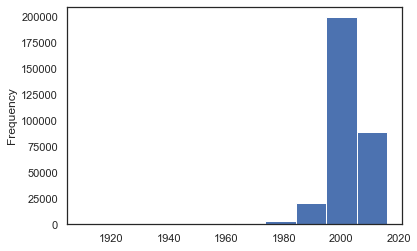

In [4]:
# Crie um Plot com a Distribuição de Veículos com base no Ano de Registro
df['yearOfRegistration'].plot.hist()

## Variação da faixa de preço pelo tipo de veículo

{'whiskers': [<matplotlib.lines.Line2D at 0x170db1a2ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x170db1b1580>,
 'boxes': [<matplotlib.lines.Line2D at 0x170db1a2a90>],
 'medians': [<matplotlib.lines.Line2D at 0x170db1b1ca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x170db1bb070>],
 'means': []}

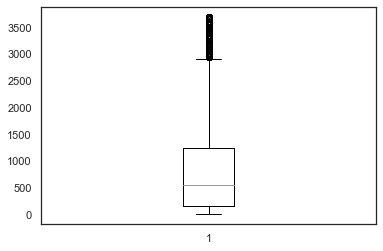

In [5]:
indexes=list(pd.unique(df['vehicleType']))
df2=df.loc[df['vehicleType']==indexes[0],'price'].values
plt.boxplot(df2)

## Contagem total de veículos conforme o tipo de véiculo

<AxesSubplot:xlabel='vehicleType'>

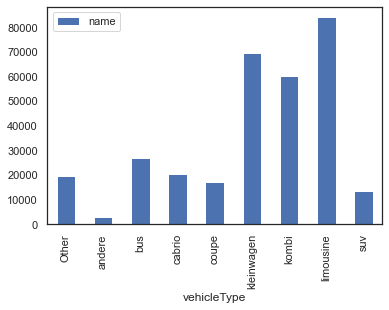

In [6]:
df3=df.groupby('vehicleType').count()
df3.plot(y='name',kind='bar')

## Número de veículos pertencentes a cada marca

<AxesSubplot:xlabel='brand'>

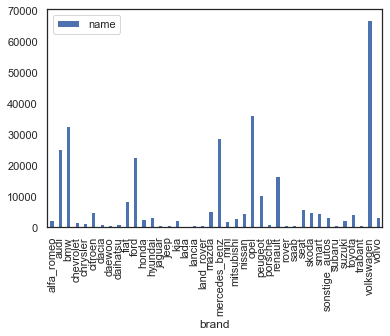

In [11]:
df4 = df[['name','brand']].groupby('brand').count()
df4.plot(y='name',kind='bar')

## Preço médio dos veículos com base no tipo de veículo, bem como no tipo de caixa de câmbio

<AxesSubplot:xlabel='vehicleType', ylabel='price'>

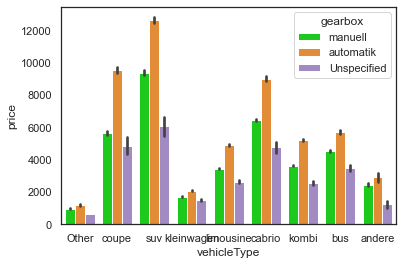

In [13]:
colors = ["#00e600", "#ff8c1a","#a180cc"]
sns.barplot(x="vehicleType", y="price",hue="gearbox", palette=colors, data=df)